# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## Part 2: The Heat Equation

After the crash course on finite difference methods in the first part we now return
to more known waters, namely numerical methods for ODE. The main goal
of this part  to develop a solver for the __classical heat equation__
\begin{alignat*}{3}
\partial_t u - \kappa \Delta u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega.
\end{alignat*}
and this will be accomplished by
transforming the heat equation into an (large) ODE system
with the help of the finite difference method.

### Chapter 1: The Crank-Nicolson and $\theta$-Method for ODEs

We start from SMIA Lecture 22 on Runge-Kutta methods (have a look at the Jupyter notebook for concepts and notation).

#### Task 1: Derivation of the Crank-Nicolsen method

We recall the initial value problem for ordinary differential equations:

Given function $f: [0,T] \times \RR^n \to \RR^n$ and initial value
$y_0 \in \RR$, find $y: [0,T] \to \RR^n$ such that
\begin{align}
y'(t) &= f(t,y(t)) \quad t \in (0,T),
\tag{1a}
\\
y(0) &= y_0.
\tag{1b}
\end{align}

Recall the integral representation of (1a)-(1b) considered in Lecture 21 and 22
and apply the trapezoidal rule to the integral. 

__a__) How does the resulting one-step method look like?

__b__) Is this a Runge-Kutta method? Write down the Butcher table. 

<font color="blue">
    Trapezium method states
        $\int_{t_i}^{t_{i+1}} f(t) dt \approx \frac 1 2 \tau (f_i + f_{i+1})$
    where $\tau = t_{i+1}-t_i$.
    We evaluate $f$ at $t_i$ and $t_i + \tau$
    This gives $\xi_1 = t_i + c_1 \tau = t_i \implies c_1 = 0$
    and $\xi_2 = t_i + c_2 \tau = t_i + \tau \implies c_2 = 1$.
    $$
    y(t_{i+1}) - y(t_i) \approx \sum_j b_j f_j = \frac 1 2 f_i + \frac 1 2 f_{i+1}
    $$
    gives $b_1 = b_2 = \frac 1 2$. Also, $f_{i+1}$ is given again by the trapezium rule:
    $$
    f_{i+1} = f\left(t_i + \tau, y_i + \frac 1 2 f_i + \frac 1 2 f_{i+1}\right)
    $$
    \begin{align}
    \renewcommand\arraystretch{1.2}
    \begin{array}
    {c|cc}
    0 & &  \\
    1 & 1/2 & 1/2 \\
    \hline
    & 1/2 & 1/2
    \end{array}
    \end{align}
</font>

#### Task 2: The the $\theta$-method

For $\theta \in [0,1]$ define the one-step theta method by

$$
y_{i+1} = y_i + \tau\left(\theta f(t_{i+1}, y_{i+1}) + (1-\theta)  f(t_{i}, y_{i})\right),
$$
so for a given $\theta$, a weighted sum/convex combination 
of $(t_{i+1}, y_{i+1})$ and $f(t_{i}, y_{i})$ is taken.

a) Write down the Butcher table.

<font color="blue">
    We compare the formula to the formula for general RK
    \begin{align}
    y_{n+1} &= y_n + \tau \sum_{i=1}^s b_i k_i \\
    k_i &= f\left( t_n + c_i \tau, y_n + \tau \sum_{j=1}^s a_{ij} k_j \right)
    \end{align}
    and see that $b_1 = 1-\theta$ and $b_2 = \theta$.
    Write out the expressions for $k_i$:
    \begin{align}
    k_1 &= f\left( t_n + 0 \tau, y_n + 0 k_1 + 0 k_2 \right) \\
    k_2 &= f\left( t_n + 1 \tau, y_n + \tau(1-\theta) k_1 + \tau\theta k_2 \right)
    \end{align}
    And compare with the general formula to see that
    $c_1 = 0$, $c_2 = 1$, $a_{11} = a_{12} = 0$, $a_{21} = 1 - \theta$, and $a_{22} = \theta$.
    This gives the table
    \begin{align}
    \renewcommand\arraystretch{1.2}
    \begin{array}
    {c|cc}
    0 & &  \\
    1 & 1-\theta & \theta \\
    \hline
    & 1-\theta & \theta
    \end{array}
    \end{align}
</font>

b) Which known schemes to you get for $\theta=0,1,0.5$?

<font color="blue">
    $\theta=1/2$ gives the same method as in the first problem, the Crank-Nicolsen method.
    $\theta = 0$ gives the following:
    \begin{align}
    \renewcommand\arraystretch{1.2}
    \begin{array}
    {c|cc}
    0 & &  \\
    1 & 1 & 0 \\
    \hline
    & 1 & 0
    \end{array}
    \end{align}
    $\theta = 1$ gives the following:
    \begin{align}
    \renewcommand\arraystretch{1.2}
    \begin{array}
    {c|cc}
    0 & &  \\
    1 & 0 & 1 \\
    \hline
    & 0 & 1
    \end{array}
    \end{align}
    And using the fact that if $b_i = 0$, then the function is never evaluated at $c_i$,
    we can remove columns/row number $i$, because the method has fewer stages.
    Doing this, and comparing Butcher tables, we see that $\theta = 1$ gives the explicit Euler method
    \begin{align}
    \renewcommand\arraystretch{1.2}
    \begin{array}
    {c|c}
    0 & 0 \\
    \hline
      & 1
    \end{array}
    \end{align}
    and $\theta = 0$ gives the implicit backwards Euler method
    \begin{align}
    \renewcommand\arraystretch{1.2}
    \begin{array}
    {c|c}
    1 & 1 \\
    \hline
      & 1
    \end{array}
    \end{align}
</font>

c) Use the __order conditions__ to determine the consistency order of the   $\theta$-method. (Your answer will depend on the choice of $\theta$. 
(Order condition will be discussed in the Lectures notes for cancelled Lecture 23).

<font color="blue">
    We simply need to plug numbers into formulas:
    \begin{align}
    \sum b_i = 1 - \theta + \theta = 1 \quad&\text{(always order 1)} \\
    \sum b_i c_i = 0(1-\theta) + 1\theta = \frac 1 2 \quad&\text{(order 2 if $\theta=1/2$)}
    \end{align}
    for order 3 and up, the condition $\sum b_i a_{ij} c_j = (1-\theta)(\theta)(1) = 1/6$ fails when $\theta = 1/2$,
    so the method is never of order 3.
</font>

d) Determine the stability function for $\theta$-method. (Will be the topic
in the Lecture on Wednesday, 13th of Nov.)

<font color="blue">
    We apply the method to a general linear test problem.
    This can be done for a general RK method, and this is done in the notes by Anne Kværnø,
    and we obtain
    $$
    R(z) = 1  + zb^T(I - zA)^{-1} \mathbf 1
    $$
    where $\mathbf 1$ is a column vector of ones.
    In our case:
    $$
        R(z) = 1  + z\begin{bmatrix}1-\theta \\ \theta\end{bmatrix}
        \begin{bmatrix}1 & 0 \\ \frac {\theta-1} {\theta z} & \frac 1 {\theta z} \end{bmatrix}
        \begin{bmatrix} 1 \\ 1 \end{bmatrix}
    $$
    multiplying out the matrices is tedious, so i will not type it all out in latex :).
    I got
    $$
        R(z) = 1 + z -\theta z + \theta
    $$
</font>

#### Task 3

Implement the $\theta$ method and compute the numerical solution to simple initial value 
problem
$$
y' = \mu y 
\\
y(0) = y_0.
$$

__a__) Implement the general $\theta$-method and validate your implementation
by computing the numerical solution for
initial vale problem on the interval $(0,1)$ for $y_0=1$, $\mu = 1$, including a 
convergence/EOC test as we did before.

<font color="blue">
    I am assuming that by "general" you mean for arbitrary theta, and not for arbitrary problems, since i would like to solve the equation for $y_{n+1}$, which depends on the problem at hand, and i see no way around it.
    We are very lucky:
    \begin{align}
        k_1 &= \mu y_n \\
        k_2 &= \mu (y_n + \tau(1-\theta)k_1 + \tau\theta k_2)
    \end{align}
    i. e.
    $$
     k_2 = \frac {\mu (y_n + \tau(1 - \theta)k_1)}{(1 - \tau\theta \mu)}
    $$
    so we can skip solving the equation numerically.
</font>

In [1]:
import numpy as np

def theta_method(y0, mu, t0, T, n, theta=0.5):
    ts = np.full(n, np.nan)
    ys = np.full(n, np.nan)
    
    ts[0] = t0
    ys[0] = y0
    
    dt = (T - t0)/n
    
    for i in range(0, n-1):
        ts[i+1] = ts[i] + dt
        k1 = mu * ys[i]
        k2 = mu * (ys[i] + dt*(1-theta)*k1) / (1 - dt*theta * mu)
        ys[i+1] = ys[i] + dt * ((1-theta)*k1 + theta*k2)
    
    return (np.array(ts), np.array(ys))

<IPython.core.display.Javascript object>


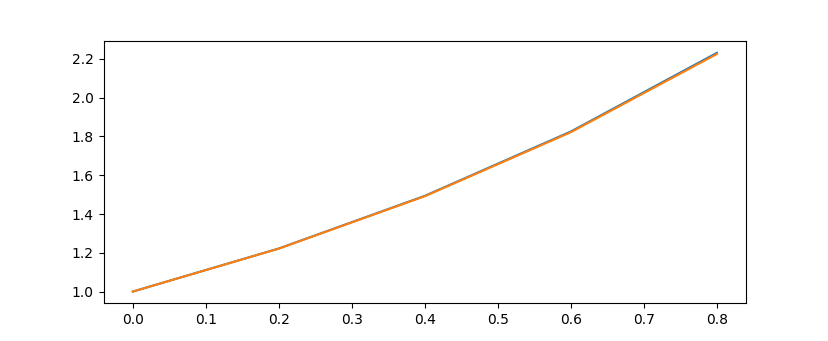

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

t, y = theta_method(1, 1, 0, 1, 5)
plt.plot(t,y)
plt.plot(t, np.exp(t));

In [4]:
e = []
Ns = [50, 100, 250,500,1000,2000]

for N in Ns:
    t, y = theta_method(y0=1,mu=1,t0=0,T=1,n=N)
    y_exact = np.exp(t)
    e.append(np.max(np.abs(y - y_exact)))


print("EOC")
eocs = []
for i in range(1, len(Ns)):
    log_eps = np.log(e[i]) - np.log(e[i-1])
    log_dN  = np.log(Ns[i-1]) - np.log(Ns[i])
    eoc     = log_eps / log_dN
    eocs.append(eoc)
    print(f"N = {Ns[i]:2}, EOC(N) = {eoc:1.4}")
print(f"mean EOC = {np.mean(eocs):1.4}")

EOC
N = 100, EOC(N) = 1.971
N = 250, EOC(N) = 1.987
N = 500, EOC(N) = 1.994
N = 1000, EOC(N) = 1.997
N = 2000, EOC(N) = 1.999
mean EOC = 1.99


__b)__ Now for $\mu \in \{-10, -100, -1000\}$ define the reference step length
$\tau_{\mu} = \dfrac{2}{|\mu|}$, plot the exact solutions and compute and plot
the numerical solution for $\tau \in \{ 5\tau_{\mu}, \tau_{\mu}, 1/5\tau_{\mu} \}$
and $\theta \in \{0, 0.5, 1\}$ What do you oberserve and why?

<IPython.core.display.Javascript object>


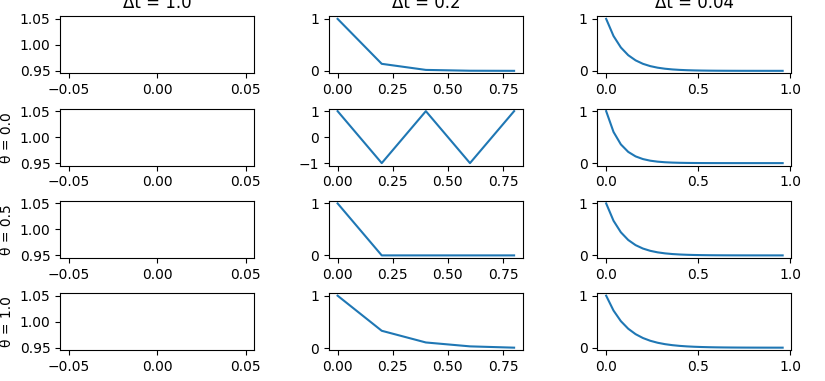

<IPython.core.display.Javascript object>


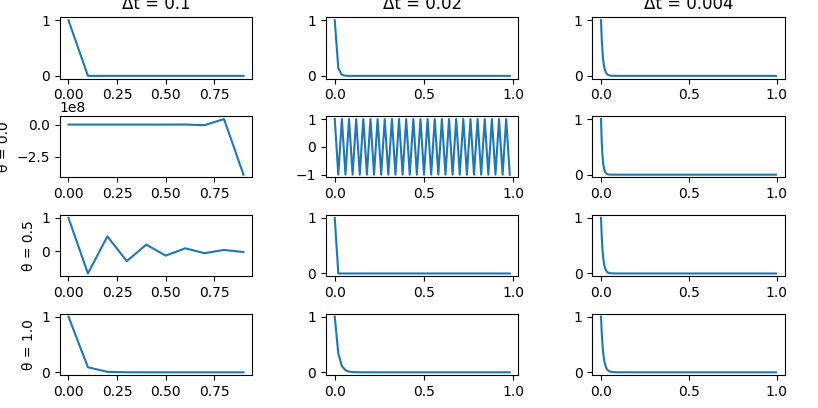

<IPython.core.display.Javascript object>


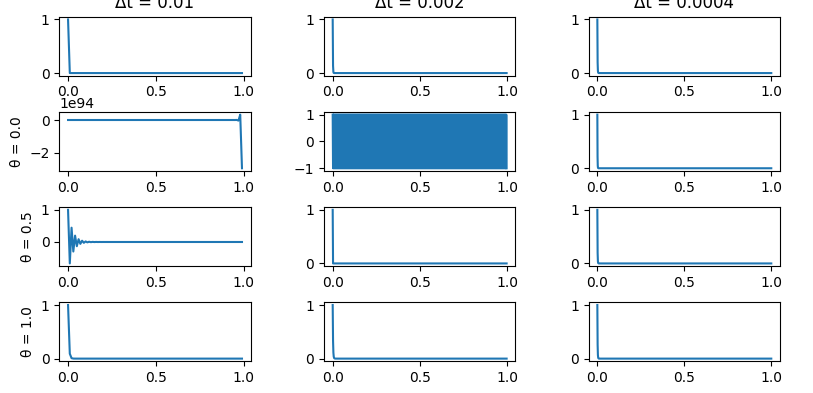

In [5]:
%matplotlib notebook

def do_the_thing(mu):
    f, ax = plt.subplots(4,3)
    f.tight_layout()
    tau_mu = 2/abs(mu)
    for i, dt in enumerate([5*tau_mu, tau_mu, tau_mu/5]):
        t = np.arange(0, 1, dt)
        y_exact = np.exp(mu*t)

        ax[0, i].plot(t, y_exact)
        ax[0, i].set_title(f"Δt = {dt}")
        
        for j, th in enumerate([0.0, 0.5, 1.0]):
            t, y = theta_method(y0=1,mu=mu,t0=0,T=1,n=int(np.ceil(1/dt)),theta=th)
            ax[j+1,i].plot(t,y)
            ax[j+1,0].set_ylabel(f"θ = {th}")

            
do_the_thing(-10)
do_the_thing(-100)
do_the_thing(-1000)

First of all, since the interval is half-open (numpy default), the plots with $\Delta t = 1$ has only one point.
I could include the endpoint i guess, but even the problem statement is with an open interval (which would make it no points), so i will just leave it.
For $\theta = 0$, the method is explicit. We can clearly see that this method is stable only for very small stepsizes.
$\theta = 1$ is the backwards euler method, implicit, and seems to give fairly good results even with relatively
big step sizes. $\theta = 1/2$ is stable for larger step sizes than forward euler, but suffers from some oscillations at large step sizes in this particular problem.

As stated in the notes by Anne Kværnø, no explicit methods are A-stable. So for stiff problems, we have to use implicit methods. I have not seen a definition of "stiff" beyond "a problem if stiff if certain numerical methods are unstable",
so i guess this problem is stiff. With explicit mehods,  this forces us to use a really small step size, even though the solution is very smooth, and has no sudden variation.

### Chapter 2: The $\theta$-method for the heat equation

\Now you are asked to combine the $\theta$ scheme the finite difference method 
as space discretization to solve the heat equation

\begin{alignat*}{3}
\partial_t u  - \Delta u  &= f  \quad && \text{in } \Omega \times (0,T]
\\
u &= g_D \quad && \text{on } \partial \Omega \times (0, T]
\\
u(x,0) &=  u_0(x) \quad && \text{in } \Omega
\end{alignat*}
 
with initial value $u_0$ and bounday value $g_D$. As before $\Omega = [0,1]^2$.
We proceed as follows.

As in Chapter 2 of part 1 a grid of $N = (n+1)^2$ grid points
$$
\{(x_j,y_j)\}_{i,j=0}^n = \{(ih,jh) \in [0,1]^2: 0\leqslant i,j \leqslant n \}
$$ are defined with the grid size $h = 1/n$.

Now we discretize in space first, starting from the idea that
\begin{align}
f(x,y,t) &= \partial_t u(x,y,t)  - \Delta u(x,y,t)
\nonumber
\\
&\approx \partial_t u(x,y,t)- (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x,y,t)
\nonumber
\end{align}

Since we have a partial differential equation which depends on time,
the idea is to associate with each grid point $(x_i,y_j)$ a 
__time-dependent__ unknown $U_{i,j}(t)$. Then using the finite difference method 
in space to discretize the Poisson operator $-\Delta$ we end up with the following
__system of ordinary differential equations__:

Find $U(t) = \{U_{i,j}\}_{i,j=0}^n \in \RR^{(n+1)^2} = \RR^N$ such that
\begin{align}
&\dfrac{d}{dt}U_{i,j}(t) 
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}(t)
\nonumber
\\
=
&\dfrac{d}{dt}U_{i,j}(t) + \dfrac{4 U_{i,j}(t) - U_{i+1,j}(t) - U_{i,j+1}(t) - U_{i-1, j}(t) -  U_{i, j-1}(t)}{h^2}
\nonumber
\\
= & f(x_i, y_j,t) =: F_{ij}(t) \quad \text{for } i,j = 1,\ldots n-1,
\tag{2a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{2b}
\end{align}
together with the boundary conditions
\begin{gather}
U_{i,j}(t) = g_D(x_i, y_j, t) \quad \text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
\tag{2c}
\end{gather}

This is often also called a __semi-discretization (in space)__ of the heat equation (since we only discretized the equation in space but not yet in time).

Next, we subdivide $(0,T)$ into $m$ subintervals defined by the points
$\{t_k\}_{k=0}^m$ with $t_k = \tfrac{k T}{m}$,
and apply the $\theta$ method to the ODE system (2a).
We write $U_{i,j}^k$ for the approximation of $U_{i,j}(t_k)$,
$F_{i,j}^k = F_{i,j}(t_k)$,
and introduce $\overline{\theta} = 1 - \theta$.
Then after reordering terms we need to solve
\begin{align}
&\phantom{=} U_{i,j}^{k+1} 
+\tau \theta \dfrac{4 U_{i,j}^{k+1} - U_{i+1,j}^{k+1} - U_{i,j+1}^{k+1} - U_{i-1, j}^{k+1} -  U_{i, j-1}^{k+1}}{h^2}
\nonumber
\\
&= U_{i,j}^{k} -\tau \theta \dfrac{4 U_{i,j}^{k} - U_{i+1,j}^{k} - U_{i,j+1}^{k} - U_{i-1, j}^{k} -  U_{i, j-1}^{k}}{h^2}   + \tau \theta F_{ij}^{k+1} + \tau \overline{\theta} F_{ij}^{k}
\quad \text{for } i,j = 1,\ldots n-1,
\tag{3a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{3b}
\end{align}
together with the boundary conditions
\begin{align}
U_{i,j}^{k+1} = g_D(x_i, y_j, t_{k+1}) \quad 
&\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}
\nonumber
\\
&\text{for } k = 1, \ldots, m.
\tag{3c}
\end{align}


Finally, we need to translate (3a)-(3c) into a linear  system.
We introduce again as for the 2D Poisson problem an index mapping $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$ to translate the double index into a single index $I = I(i,j) \in \RR^N$, $N=(n+1)^2$. Then applying the $\theta$ scheme to (2a) results in the
following method:

* Set $U^0 = \{U^0_{I}\}_{I=0}^{N-1} \in \RR^N$ with $U^0_{I(i,j)} = u_0(x_i, y_j)$ 
 for $i,j = 0,\ldots n$.
* For $k=0,\ldots, m-1$, compute $U^{k+1} \in \RR^N$ by solving the
linear system
 \begin{align}
 (\Id + \tau \theta A)U^{k+1}
= B^{k+1}
\tag{4}
\end{align}

Note this is only the case if $\theta > 0$, for $\theta = 0$, we have an explicit solver.
Here $\Id$ is the $N \times N$ identity matrix, and $A$ is the $N\times N$ matrix
resulting from the finite difference operator after index-remapping, and
with $A_{I,I} = 0$ for those index $I$ which correspond to a boundary index tuple
$(i,j)$. So $A$ is in principal the same matrix you implemented
in Part 1, Chapter 2, Task 3 but __without__ the extra modifications to set
boundary conditions.

The right-hand side $B^{k+1} \in \RR^{N}$ is computed as follows. First you compute
$$
B^{k+1} := (\Id - \tau \overline{\theta} A)U^{k}
+ \tau \theta F^{k+1} + \tau \overline{\theta} F^{k}.
$$
To incorporate the boundary conditions, you now modify $B^{k+1}$
for those index $I$ which correspond to a boundary index tuple 
$(i,j)$ by setting
$$
B^{k+1}_{I(i,j)} = g_D(x_i, y_j, t_{k+1}) \quad 
\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
$$
Since $A_{I,I}= 0$ for those indices, we see that then
$$
 ((\Id + \tau \theta A)U^{k+1})_{I} = U^{k+1}_{I} = B^{k+1}_{I} = g_D(x_i, y_j, t_{k+1})
$$
so $U^{k+1}$ satisfy our boundary condition at the boundary grid points at $t_{k+1}$.

#### Task 4

Implement the resuling solver to solve the heat equation. Reuse as much code
as possible from Part 1, Chapter 2 on the 2D Poisson problem, in particular
the generation of the finite difference matrix and the implementation of 
boundary conditions.

For code validation, use analytical reference function of the form
$$
u(x,y,t) = \sin(k x) \sin(l y)\exp(-\mu t)
$$
on $\Omega = [0,2\pi]^2$ and $t_0 = 0$ and $T = 1$.
for some integers $k, l$ and a constant $\mu$.

a) Find $\mu = \mu(k,l)$ so that u(x,y,t) is a solution of the
heat equation with $f = 0$.

b) For $\theta \in \{0, 0.5, 1\}$ compute the numerical solution with initial data and boundary data corresponding to the function you determined in __a__)
on a number of grids with $n = \{10, 20, 40, 80\}$ corresponding to grid sizes $h = \{2\pi/10, 2\pi/20, 2\pi/40, 2\pi/80\}$.

For each of the $h$, choose the corresponding time step $\tau = h/(2\pi)$
to run your simulation and create an animation (see coding hints below)
for

* the exact solution;
* the numerical solution;
* the error function defined by $E_{i,j}^k = U^k_{i,j} - u(x_i, y_i, t_k)$.

c) For the simulation you ran in __b__) compute the total error as
as a function of $n$
$$
\mathrm{err(n)} = \max_{k} \max_{i,j} | U^k_{i,j} - u(x_i, y_i, t_k) |
$$
What error convergence rates do you obtain for the various $\theta$?

#### Problem a.
$u$ needs to solve $\partial_t u = \nabla^2 u$.
Notice:
\begin{align}
    \partial_t u &= -\mu u \\
    \nabla^2 u = \partial_x^2 u + \partial_y^2 u &= -k^2 u -l^2 u
\end{align}
by comparison, we see that $\mu = k^2 + l^2$.
Also, note that $sin0 = sin2\pi = 0$, so on the boundary the function is constantly zero.

In [116]:
from scipy.sparse import identity, dok_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import factorized

def I(i,j,n):
    return i + j*(n+1)

def discretized_operator(I, L, n):
    # This returns the (Id + dt*th*A) operator
    # that appears in the LHS of the equation.
    # Can also be used with th = -(1-th) for the one on the RHS.
    
    # I is an index mapping.
    # th is theta.
    # n is the number of sub-intervals along each axis in the domain.
    # dt is the step length in time.
    
    # Gridsize
    h = L/n
    
    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n+1)**2

    # Define zero matrix A of right size and insert 0
    A = dok_matrix((N, N))
    
    # Define FD entries of A
    hh = h*h
    for i in range(1, n):
        for j in range(1, n):
            A[I(i,j,n), I(i,j,n)]   =  4/hh
            A[I(i,j,n), I(i+1,j,n)] = -1/hh
            A[I(i,j,n), I(i-1,j,n)] = -1/hh
            A[I(i,j,n), I(i,j+1,n)] = -1/hh
            A[I(i,j,n), I(i,j-1,n)] = -1/hh

    return A

def apply_bcs(B, G, n, I):
    # Add boundary values related to unknowns from the first and last grid ROW
    bc_indices = [ I(i,j,n)  for j in [0, n] for i in range(0, n+1) ]
    B[bc_indices] = G[bc_indices]  

    # Add boundary values related to unknowns from the first and last grid COLUMN
    bc_indices = [ I(i,j,n)  for i in [0, n] for j in range(0, n+1) ]
    B[bc_indices] = G[bc_indices]
    
    return B

def solve_heat_eqn(U0, f, g, x, y, L, n, t0, T, n_t, th=0.5,supress_text=True):
    # I Take in n_t, the number of time steps, as a parameter,
    # because i would rather pre-allocate the memory instead of growing
    # a list every time.
    dt = (T-t0)/n_t
    N  = (n+1)**2
    
    if not supress_text:
        print(f"Solving with dt = {dt}, n = {n} -> N = {N}")
    
    # Create the operators we need.
    # NOTE!!! In some of our problems, the domain is not the unit square,
    # so we can not keep assuming L = 1.
    A = discretized_operator(I, L, n)
    Id = identity(N)
    
    
    lusolve = factorized((Id + dt*th*A).tocsc())
    
    # Galculating G over the entire domain every time
    # is a bit wasteful, but its the way we did it in
    # the last task, so in order to reuse code, i guess
    # this is what we do here as well.
    Gs = np.full([N, n_t], np.nan)
    Gs[:,0] = g(x, y, t).ravel()
    
    Fs = np.full([N, n_t], np.nan)
    Fs[:,0] = f(x, y, 0).ravel()
    
    # Runge Kutta iteration with theta method.
    ts = np.full(n_t, np.nan)
    ts[0] = t0
    
    Us = np.full([N, n_t], np.nan)
    Us[:,0] = U0
    
    for k in range(0, n_t-1):
        ts[k+1] = ts[k] + dt
        Fs[:,k+1] = f(x, y, ts[k+1]).ravel()
        
        # Caluclate BCs again, since they may be time-dependant
        Gs[:,k+1] = g(x, y, ts[k+1]).ravel()
        
        B = (Id - dt*(1-th) * A) @ Us[:,k] + dt*(1-th)*Fs[:,k] + dt*th*Fs[:,k+1]
        B = apply_bcs(B, Gs[:,k+1], n, I)
        
        Us[:,k+1] = lusolve(B)
        
    return ts, Us

In [127]:
# Provided animation code

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def plot2D(X, Y, Z, title=""):
    # Define a new figure with given size an
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,             
                           rstride=1, cstride=1, # Sampling rates for the x and y input data
                           cmap=cm.viridis)      # Use the new fancy colormap viridis
    
    # Set initial view angle
    ax.view_init(30, 225)
    
    # Set labels and show figure
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(title)
    plt.show()

def _plot_frame_fdm_solution(i, ax, X, Y, U_list, title, zlim=None):
    ax.clear()
    line  = ax.plot_surface(X, Y, U_list[i],             
            rstride=1, cstride=1, # Sampling rates for the x and y input data
            cmap=cm.inferno,
            vmin=np.min(U_list[0]),
            vmax = np.max(U_list[0]))
    if zlim is not None:
        ax.set_zlim(zlim)
    total_frame_number = len(U_list)
    ax.set_title(title)
    return line

def plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    fargs = (ax,X,Y,U_list, title, zlim)
    frame_plotter = _plot_frame_fdm_solution

    frames = len(U_list)
    interval = duration/frames*1000
    ani = animation.FuncAnimation(fig, frame_plotter, 
            frames=len(U_list), fargs=fargs, 
            interval=interval, blit=False, repeat=True)
    return ani

In [118]:
f  = lambda x, y, t: 0*x + 0*y
g  = lambda x, y, t: 0*x + 0*y - min(t, 1/2) # added some time dependance jsut to see what it looked like

k = 1
l = 1/2
u_exact = lambda x, y, t: np.sin(k*x)*np.sin(l*y)*np.exp(-(k**2 + l**2)*t)


n = 20
n_t = 500

# Generate grid
L = 2*np.pi
xi = np.linspace(0,L,n+1)
yi = np.linspace(0,L,n+1)
x,y = np.meshgrid(xi,yi,sparse=True)

U0_grid = u_exact(x, y, 0)
U0 = U0_grid.ravel()

t, T = (0, 3)

ts, Us = solve_heat_eqn(U0, f, g, x, y, L, n, t, T, n_t)

<IPython.core.display.Javascript object>


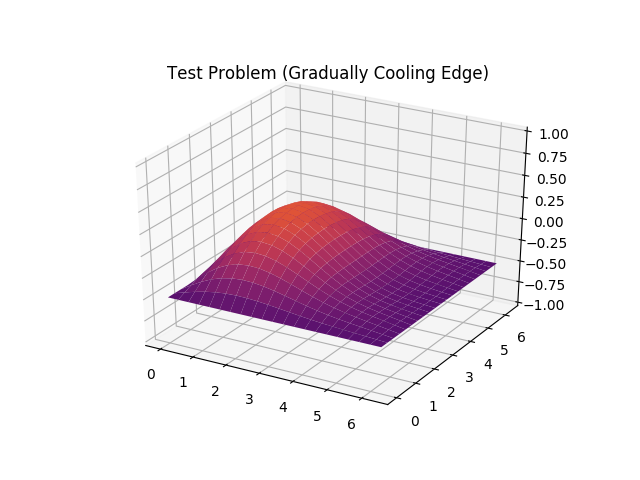

In [119]:
# Test animation to see that the solver gives reasonable output
%matplotlib notebook
Us_grid = [ Us[:,i].reshape((n+1, n+1)) for i in range(n_t) ]
ani = plot_2D_animation(x, y, Us_grid, title="Test Problem (Gradually Cooling Edge)", duration=10, zlim=(-1,1));

In [120]:
# Save animation to disk.
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=60, bitrate=36000)
# ani.save('heat.mp4', writer=writer)

In [122]:
%matplotlib notebook
# Problem B.
def sim_error(th, n, animation_format=False):
    h = 2*np.pi/n
    dt = h/(2*np.pi)
    t, T = (0, 1)

    n_t = int(np.ceil(T/dt))

    f  = lambda x, y, t: 0*x + 0*y
    g  = lambda x, y, t: 0*x + 0*y
    u_exact = lambda x, y, t: np.sin(x)*np.sin(y)*np.exp(-2*t)

    # Generate grid
    L = 2*np.pi
    xi = np.linspace(0,L,n+1)
    yi = np.linspace(0,L,n+1)
    x,y = np.meshgrid(xi,yi,sparse=True)

    U0_grid = u_exact(x, y, 0)
    U0 = U0_grid.ravel()

    ts, Us = solve_heat_eqn(U0, f, g, x, y, L, n, t, T, n_t, th)

    Us_exact = np.full([(n+1)**2, n_t], np.nan)
    for i, t in enumerate(ts):
        Us_exact[:,i] = u_exact(x,y,t).ravel()

    Es = Us - Us_exact

    if not animation_format:
        return Us, Us_exact, Es
    else:
        Us_grid = [ Us[:,i].reshape((n+1, n+1)) for i in range(n_t) ]
        Us_exact_grid = [ Us_exact[:,i].reshape((n+1, n+1)) for i in range(n_t) ]
        Es_grid = [ Es[:,i].reshape((n+1, n+1)) for i in range(n_t) ]
        return Us_grid, Us_exact_grid, Es_grid, x, y, dt

<IPython.core.display.Javascript object>


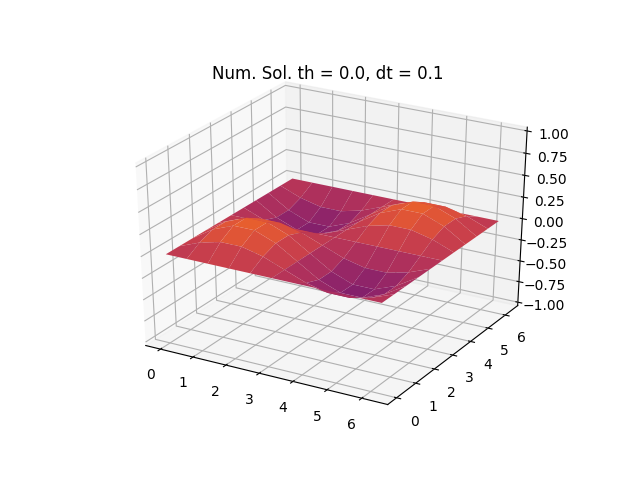

<IPython.core.display.Javascript object>


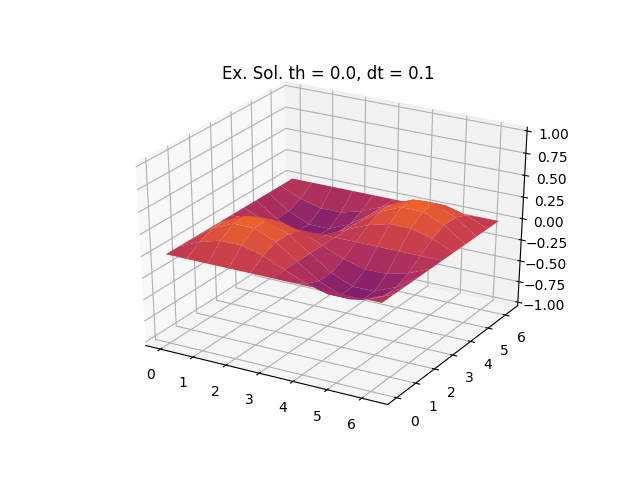

<IPython.core.display.Javascript object>


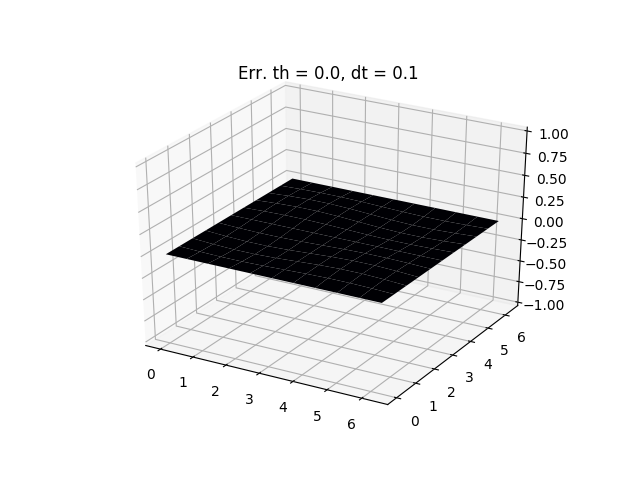

In [123]:
n  = 10
th = 0.0
U_grid, U_exact_grid, E_grid, x, y, dt = sim_error(th,n,animation_format=True)
a = plot_2D_animation(x, y, U_grid, title=f"Num. Sol. th = {th}, dt = {dt}", duration=10, zlim=(-1,1))
ae  = plot_2D_animation(x, y, U_exact_grid, title=f"Ex. Sol. th = {th}, dt = {dt}", duration=10, zlim=(-1,1))
e = plot_2D_animation(x, y, E_grid, title=f"Err. th = {th}, dt = {dt}", duration=10, zlim=(-1,1))

<font color='blue'>
I can't render all the animations at the same time on my computer, because python is too slow. But all the animations the problem statement asked for can be seen my modifying the parameters.
Note especially what happens with the explicit method for fine grids; the numerical solution explodes.
</font>

In [124]:
def calc_err(th, ns):
    e = []
    for n in ns:
        U, U_exact, E = sim_error(th,n)
        err = np.max(np.abs(U-U_exact))
        e.append(err)
    return e

def calc_eoc(ns, es):
    eocs = []
    for i in range(1, len(ns)):
        log_de = np.log(es[i]) - np.log(es[i-1])
        log_dn = np.log(ns[i-1]) - np.log(ns[i])
        eoc = log_de / log_dn
        eocs.append(eoc)
    return eocs, np.mean(eocs)

In [125]:
ns = [ 10, 20, 40, 80 ]

for th in [0.0, 0.5, 1.0]:
    es = calc_err(th, ns)
    eocs, eoc = calc_eoc(ns, es)
    print(f"theta = {th} -> mean eoc = {eoc}")

theta = 0.0 -> mean eoc = -86.44235006780082
theta = 0.5 -> mean eoc = 1.9565868538090185
theta = 1.0 -> mean eoc = 1.0348044869666306


As we can see, something is _clearly_ wrong with the explicit method.
On the other hand, the implicit method has EOC 1, which means it converges correctly, albeit a bit slower than the
Crank-Nicholson method which converges with EOC 2.

#### Task 5

Finally,  we have a closer look at the so-called CFL (Courant-Friedrichs-Lewy) condition stating that in two space dimensions,
the explicit Euler scheme given by $\theta = 0$ needs to satisfy the __time-step restriction__
$$
\tau \leqslant h^2/4
$$
to render the full discretization scheme stable. In the Wednesday lecture given by Anne Kværno, you will see/have
already seen how this is related to __stiff system__ and the concept of __$A$-stability__
and the __stability function__.

Now define $\tau$ as follows
$$
\tau = \alpha h^2/4
$$
with  a safety factor $\alpha$ and $h = 2\pi/n$ for some $n\in \NN$.

Choose $t_0 = 0$, $T=1$, $f = g_D = 0$ and
use as initial data the step function
\begin{align*}
u_0(x,y) = 
\begin{cases}
1 \quad \text{if } |x -  \pi| < \pi/3  \wedge |y -  \pi| < \pi/3
\\
0 \quad \text{else.}
\end{cases}
\end{align*}

a)
Now solve the heat equation using the explicit Euler for $n = 20$ and corresponding 
time-step $\tau$ for $\alpha = 0.9, 1, 1.1$. What do you observe?

b)
Repeat the experiment setting the end time to $T = 20$ and
$\alpha = 0.99, 1, 1.01$.  Observation? (That should demonstrate the strictness of the CFL condition.)



### Code Snippet

For the step function you can integrate the following code snippet.

In [192]:
def u_0_step(x, y):
    step = 0*np.ones_like(x)*np.ones_like(y)

    def is_inside(x, y):
        return  np.abs(x - np.pi) < np.pi/3  and np.abs(y - np.pi) < np.pi/3

    for i in range(x.shape[1]):
        for j in range(y.shape[0]):
            if is_inside(x[0,i], y[j,0]):
                step[i,j] = 1
    return step

I'd like to note that I had to change the indeces in this function; using the same meshgrid configuration as before,
the original way left the function completely zero.

<IPython.core.display.Javascript object>


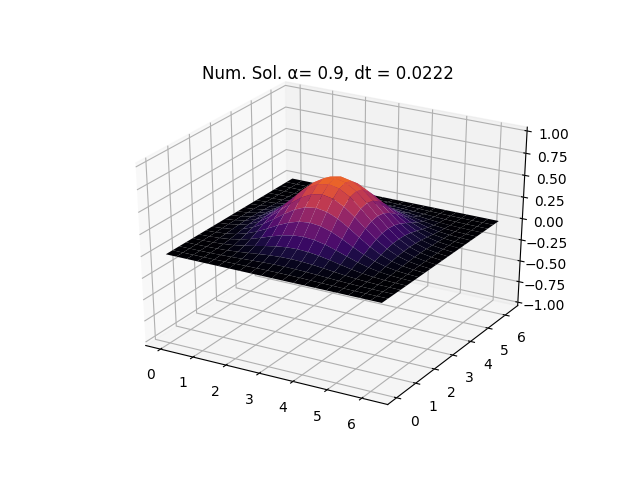

<IPython.core.display.Javascript object>


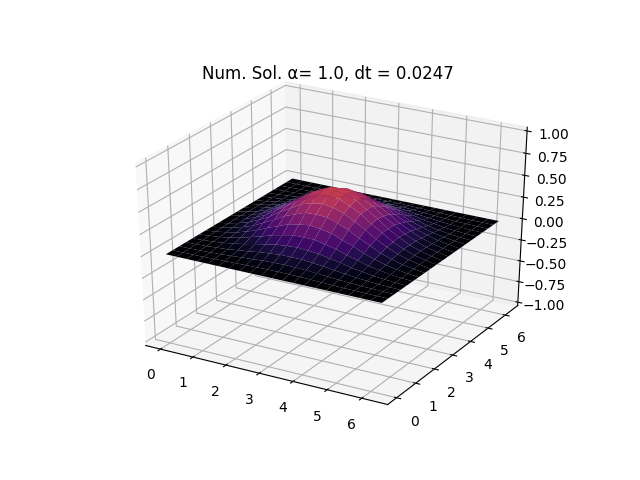

<IPython.core.display.Javascript object>


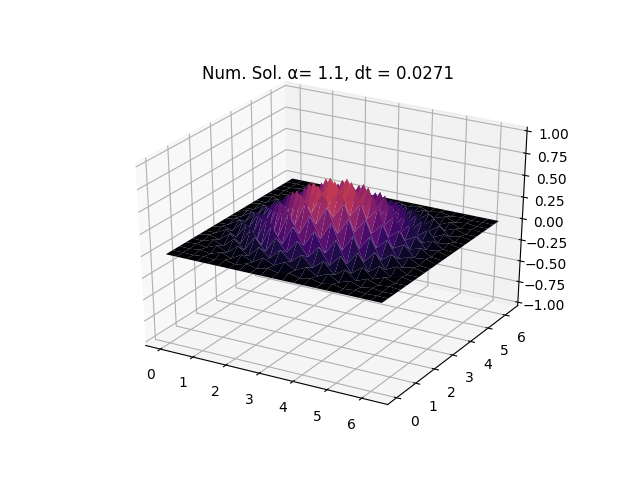

In [211]:
%matplotlib notebook
f  = lambda x, y, t: 0*x + 0*y
g  = lambda x, y, t: 0*x + 0*y

n = 20
L = 2*np.pi
h = L/n

t, T = (0, 1)

xi = np.linspace(0,L,n+1)
yi = np.linspace(0,L,n+1)
x,y = np.meshgrid(xi,yi,sparse=True)

alphas = [ 0.9, 1.0, 1.1 ]
dts = [ a * h**2/4 for a in alphas ]
n_ts = [ int(np.round(T/dt)) for dt in dts ]

U0_grid = u_0_step(x, y)
U0 = U0_grid.ravel()

an = []
for i, n_t in enumerate(n_ts):
    ts, Us = solve_heat_eqn(U0, f, g, x, y, L, n, t, T, n_t, th=0.0)
    Us_grid = [ Us[:,i].reshape((n+1, n+1)) for i in range(n_t) ]
    a = plot_2D_animation(x, y, Us_grid, title=f"Num. Sol. α= {alphas[i]}, dt = {dts[i]:0.3}", duration=10, zlim=(-1,1))
    an.append(a)

Observation: $\alpha = 1.1$ gives us problems.

<IPython.core.display.Javascript object>


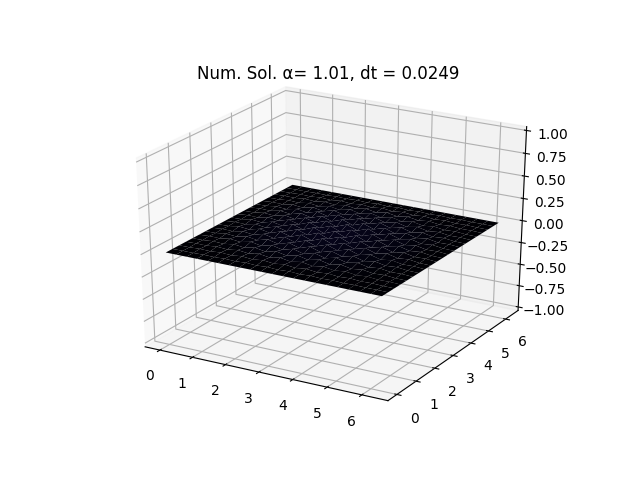

In [221]:
%matplotlib notebook
f  = lambda x, y, t: 0*x + 0*y
g  = lambda x, y, t: 0*x + 0*y

n = 20
L = 2*np.pi
h = L/n

t, T = (0, 20)

xi = np.linspace(0,L,n+1)
yi = np.linspace(0,L,n+1)
x,y = np.meshgrid(xi,yi,sparse=True)

alphas = [ 0.99, 1.0, 1.01 ]
dts = [ a * h**2/4 for a in alphas ]
n_ts = [ int(np.round(T/dt)) for dt in dts ]

U0_grid = u_0_step(x, y)
U0 = U0_grid.ravel()

for i, n_t in enumerate(n_ts):
    ts, Us = solve_heat_eqn(U0, f, g, x, y, L, n, t, T, n_t, th=0.0)
    Us_grid = [ Us[:,i].reshape((n+1, n+1)) for i in range(n_t) ]

a = plot_2D_animation(x, y, Us_grid, title=f"Num. Sol. α= {alphas[i]}, dt = {dts[i]:0.3}", duration=10, zlim=(-1,1))

With these long animations, my computer struggled to render three at once.
Never the less, $\alpha \leq 1$ is fine, so we are mostly interested in this one.
Comment: For $\alpha = 1.01$ the solution eventually explodes with error as well, confirming that the condition is _very_ strict.